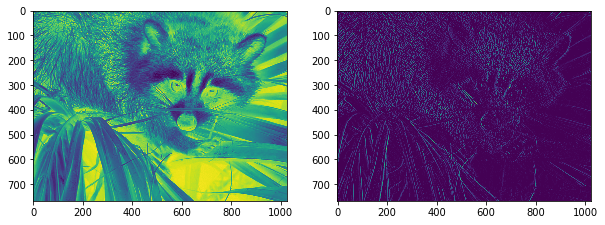

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage
import scipy.misc
# 반전  0 ~ 255
img = 255 - sp.misc.face(gray=True).astype(float) # 이미지 도영상
# edge detection filter - 경계선 검출
k = np.zeros((2,2))
# 0 0 
# 0 0
k[:,0] = 1 # 1 -1
k[:,1] = -1# 1 -1 
# convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0 , sp.ndimage.filters.convolve(img,k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages

2 427 640 3


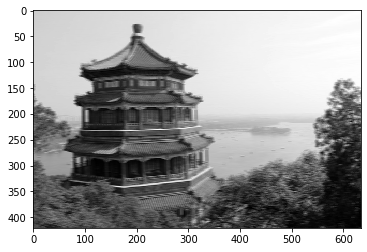

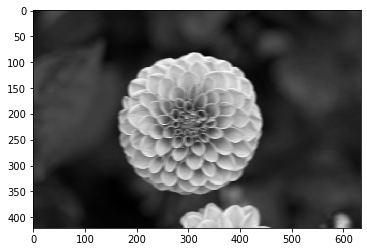

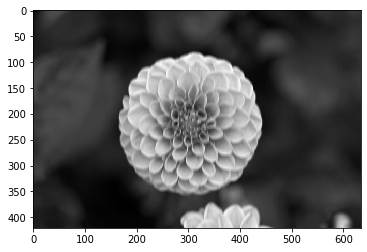

(2, 421, 634, 2)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf
# height , width , channels 3차원 # 차수 일치
china = load_sample_image("china.jpg") # 자동 4차원 0 ~ 1 . 0 ~ 255
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype = np.float32)
# 장수 높이 널이 컬러수=>숫자
batch_size , height , width, channels = dataset.shape # 2 ,427 행 640열 3 rgb
print(batch_size , height , width, channels )           #  높이  가로
filters = np.zeros(shape=(7,7,channels,2),dtype = np.float32)
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 1 1 1 1 1 1 1 
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0

filters[:,3,:,0] = 1  #수직선
filters[3,:,:,1] = 1  #수평선 
# 한차원 증가 1 ,4차원
# 주입변수     427 , 640 , 3 => 단색
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
# 이미지 포멧 결정 427 640
#convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1],
#                          padding="SAME")
# 427 213.5 => 214
#convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1],
#                          padding="SAME")
# 421x634, 7x7

convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1],
                          padding="VALID")
max_pool = tf.nn.max_pool(convolution , ksize = [1,2,2,1],
                         strides = [1,2,2,1] , padding = "SAME")

# graph (mode + edge)
with tf.Session() as sess:
    output =sess.run(convolution, feed_dict={X :dataset})
plt.imshow(output[0,:,:,1],cmap="gray")
plt.show()
plt.imshow(output[1,:,:,1],cmap="gray")
plt.show()
plt.imshow(output[1,:,:,0],cmap="gray")
plt.show()
type(output)
print(output.shape)
# 필터가 2개 이기 때문에
# 스트라이드가 1일 때 2 , 427, 640 ,2

In [3]:

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation = "nearest")
    plt.axis("off")
    
def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

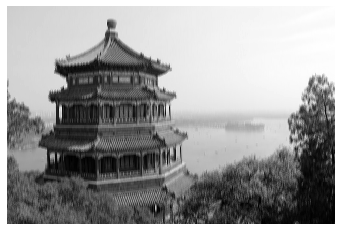

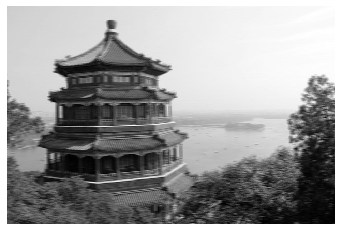

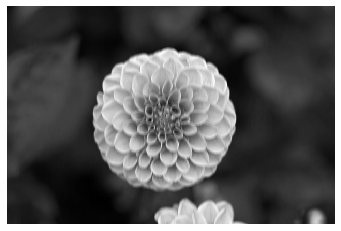

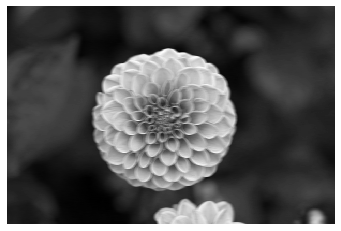

In [4]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index,:,:,feature_map_index])
        plt.show()

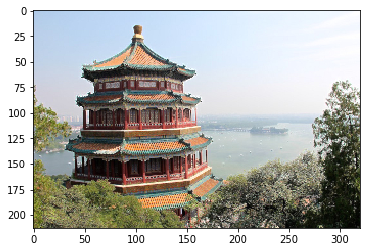

In [5]:
# max pooling 된 결과를 이미지로 출력
# conv2d 채널 1개 
# 채널 그대로 
max_pool = tf.nn.max_pool(X,ksize = [1,2,2,1], strides = [1,2,2,1],
                         padding = "VALID")
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict = {X:dataset})
plt.imshow(output[0].astype(np.uint8))
plt.show()


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


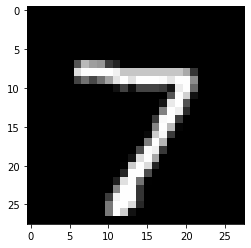

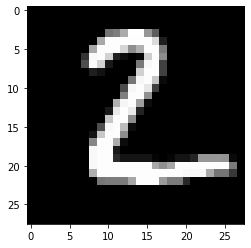

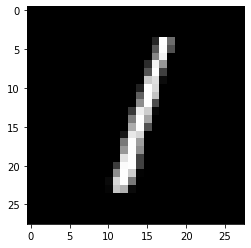

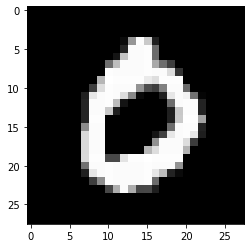

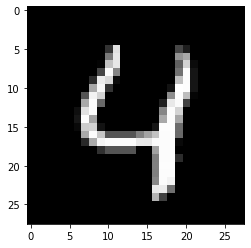

In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot= True)
# 5장의 이미지 출력 
#first_image = mnist.test.images[0] # 784
first_image = mnist.test.images[0:5]
first_image = np.array(first_image, dtype = 'float')
for i in range(5):
    pixels = first_image[i].reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
#pixels = first_image.reshape((28,28))
#plt.imshow(pixels, cmap='gray')
#plt.show()

In [7]:
learning_rate = 0.001 # optimizer 사용
num_steps = 500       # epoch
batch_size = 128      # mini batch_size
display_step = 10     # 시각화
# 변수 784
num_input = 784       # 이미지 28x28 => fully-connected (한 줄)
num_classes = 10      # one-hot-encoding
dropout = 0.75        # 과적합을 방지하기 위해서 임의적으로 25%를 계산 안함
                      # 컴퓨터가 랜덤으로 dropout시킴
# 위치를 찾기위해서 이름을 달아준다.
X = tf.placeholder(tf.float32, [None, num_input], name = 'input')# 훈련 128x784
Y = tf.placeholder(tf.float32, [None, num_classes], name = 'output')# 종속변수 128x10
keep_prob = tf.placeholder(tf.float32, name = 'keep')


드롭아웃은 개념적으로는 이해하기 쉬운 것이다. 
신경망 모델이 복잡해질 때 가중치 감소만으로는 
어려운데 드롭아웃 기법은 뉴런의 연결을 임의로 삭제하는 것이다.
훈련할 때 임의의 뉴런을 골라 삭제하여 신호를 전달하지 않게 한다. 
테스트할 때는 모든 뉴런을 사용한다.



In [8]:
# 1번 이상 반복되면 함수화
# activation function 마지막에 한번 호출 : 회귀냐 분류를 결정
# multi-layer : xor문제해결은 activation 함수를 이용해서 비선형
# cnn => deep 할 수록 결과가 좋음
def conv2d(X, W, b, strides = 1) :
    # 가중치 : filter
    X = tf.nn.conv2d(X, W, strides = [1, strides, strides, 1], padding = 'SAME')
    X = tf.nn.bias_add(X, b)
    return tf.nn.relu(X)  # relu를 쓰는 이유 : 비선형 mapping

def maxpool2d(X, k=2) :
    return tf.nn.max_pool(X, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME') # max, avg


In [9]:
# 128(batch_size) x 784(num_input)
def conv_net(X, weights, biases, dropout) : # 128x784 =>28x28
    X = tf.reshape(X, shape = [-1, 28, 28, 1]) # 원래 이미지 형태 # 128x28x28x1 - 필터가 32장
    conv1 = conv2d(X, weights['wc1'], biases['bc1']) # 128x28x28x32
    conv1 = maxpool2d(conv1, k = 2) # 128x14x14x32 (특징은 줄어들지 않음)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2']) # 128x14x14x64
    conv2 = maxpool2d(conv2, k = 2) # 128x7x7x64
    
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) # 7*7*64, 1024 # fully-connected
    # 128x7*7*64, 1024 =>(가중치 계산) => 128x1024
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout) # 25%
    # 128x1024, 1024x10 => 128x10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [10]:
weights = {
    'wc1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1' : tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out' : tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([num_classes])),
}

tf.nn.conv2d(input , filiter ,strides , padding ,....)
input : 컨볼루션 연산을 위해 입력 데이터 [batch,height,width,channels]
filter : 컨볼루션 연산에 적용할 필텨[height,widthm,in_channels,out_channels]
strides : 컨볼루션 연산을 위해 필터를 이동시키는 간격 : 컨볼루션 연산을 위해 필터를 이동시키는 간격을 나타냄
padding : SAME , VALID

tf.nn.max_pool(value, ksize , strides, padding)
value : [batch , height ,width,channels] 형식의 입력 데이터 
ksize : [1 .height, width ,1] (2 x 2) : 4개의 데이터 
strides : max pooling 을 위해 윈도우를 이동시키는것 
padding : 최대값을 뽑기위해 주변을 0 등으로 채워주는 역할 (SAME) 

In [11]:

logits = conv_net(X, weights, biases, keep_prob) # 128x10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(
    logits = logits, labels = Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name = 'accuracy')
tf.add_to_collection('accuracy', accuracy)
tf.add_to_collection('Xi', X)
tf.add_to_collection('Yi', Y)

init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1) :
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y:batch_y, keep_prob : dropout})
        if step % display_step == 0 or step ==1 :
            loss, acc = sess.run([loss_op, accuracy], feed_dict = {X : batch_x, Y : batch_y, keep_prob : 1.0})
            print('Step' + str(step) + 'Minibatch Loss=' + "{:.4f}".format(loss) + ", Training Accuracy = " + "{:.3f}".format(acc))
    save_path = saver.save(sess, 'data/cnn_model.ckpt')
    print("Testing Accuracy : ", sess.run(accuracy, feed_dict = {X:mnist.test.images[:256],
                                                                Y:mnist.test.labels[:256], keep_prob:1.0}))
    print("예측 : ", sess.run(tf.argmax(prediction, 1), feed_dict={X:mnist.test.images[100:120],
                                                                Y:mnist.test.labels[100:120], keep_prob:1.0}))

Step1Minibatch Loss=93137.2109, Training Accuracy = 0.078
Step10Minibatch Loss=34638.1797, Training Accuracy = 0.117
Step20Minibatch Loss=12544.9346, Training Accuracy = 0.391
Step30Minibatch Loss=5699.4751, Training Accuracy = 0.680
Step40Minibatch Loss=6054.0176, Training Accuracy = 0.695
Step50Minibatch Loss=5021.0723, Training Accuracy = 0.766
Step60Minibatch Loss=2253.0747, Training Accuracy = 0.828
Step70Minibatch Loss=4170.4634, Training Accuracy = 0.789
Step80Minibatch Loss=2363.6079, Training Accuracy = 0.844
Step90Minibatch Loss=1190.7776, Training Accuracy = 0.883
Step100Minibatch Loss=1618.4579, Training Accuracy = 0.883
Step110Minibatch Loss=1794.8469, Training Accuracy = 0.898
Step120Minibatch Loss=1360.2307, Training Accuracy = 0.906
Step130Minibatch Loss=1173.2700, Training Accuracy = 0.906
Step140Minibatch Loss=3822.8408, Training Accuracy = 0.836
Step150Minibatch Loss=1354.2567, Training Accuracy = 0.930
Step160Minibatch Loss=3131.2905, Training Accuracy = 0.883
Step1

# 문제 테스트 데이터 100번부터 20개의 데이터를 예측해 보시요
- 예측된 데이터를 출력해 보시요

In [15]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess, 'data/cnn_model.ckpt')
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0")
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256], Yi:mnist.test.labels[:256], keep:1.0})
print(result)
pred = sess.run(tf.argmax(prediction,1),
               feed_dict = {X : mnist.test.images[100:120],
                           Y : mnist.test.labels[100:120],
                           keep_prob: 1.0})
print(pred)
print(mnist.test.labels[100:120])
result = sess.run(accuracy,
                 feed_dict={Xi : mnist.test.images[100:120],
                           Yi : mnist.test.labels[100:120],
                           keep: 1.0})
print(result)

C:\Users\ICT01_04\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.97265625


In [16]:
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph('data/cnn_model.ckpt.meta')
new_saver.restore(sess, 'data/cnn_model.ckpt')
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0")
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(tf.argmax(prediction, 1), 
                  feed_dict={X:mnist.test.images[100:120],
                Y:mnist.test.labels[100:120], keep_prob:1.0})
print(result)

INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 9 4 4 9 2]
